## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

Create 1 slide with informative visualization for each question. Explore data using SQL and Python but use Tableau for final visualization.

Don't limit your EDA to these 10 questions. Let's be creative :).

In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [133]:
file_path = 'C:/Users/Tim/Desktop/lighthouse/w6 - midterm/'
filename = file_path+'flights.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 50000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s))
df = pd.read_csv(filename,skiprows=skip)

In [10]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-03,AA,AA_CODESHARE,AA,5707,OH,N709PS,5707,13930,ORD,...,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-03,DL,DL_CODESHARE,DL,5436,9E,N8683B,5436,13931,ORF,...,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-03,AA,AA_CODESHARE,AA,4433,YX,N115HQ,4433,12339,IND,...,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-03,B6,B6,B6,76,B6,N638JB,76,13495,MSY,...,1182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-03,B6,B6,B6,288,B6,N967JB,288,12892,LAX,...,2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay                int32
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

In [11]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_

In [12]:
missing(df)

,number,percent
no_name,50000,1.00000
total_add_gtime,49645,0.99290
first_dep_time,49645,0.99290
longest_add_gtime,49645,0.99290
cancellation_code,49135,0.98270
late_aircraft_delay,40408,0.80816
security_delay,40408,0.80816
nas_delay,40408,0.80816
weather_delay,40408,0.80816
carrier_delay,40408,0.80816


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [13]:
from scipy import stats
import seaborn as sns

In [14]:
# arr_delay
arr_delay = df['arr_delay']

In [23]:
stats.kstest(arr_delay,stats.norm.cdf)

KstestResult(statistic=nan, pvalue=nan)

In [24]:
stats.shapiro(arr_delay)

C:\Users\Tim\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [28]:
sample = df.sample(frac=0.05)
stats.shapiro(sample['arr_delay'])

#fail to reject the null hypothesis that data is normally dist

ShapiroResult(statistic=nan, pvalue=1.0)

(-300.0, 300.0)

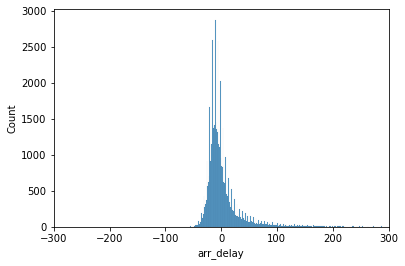

In [27]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [40]:
import datetime as dt
from datetime import date
from datetime import time

In [75]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [78]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,avg_velocity,city,country,delay
0,2018-10-03,AA,AA_CODESHARE,AA,5707,OH,N709PS,5707,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,396.455696,Chicago,IL,1
1,2018-10-03,DL,DL_CODESHARE,DL,5436,9E,N8683B,5436,13931,ORF,...,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,Norfolk,VA,0
2,2018-10-03,AA,AA_CODESHARE,AA,4433,YX,N115HQ,4433,12339,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,383.478261,Indianapolis,IN,0
3,2018-10-03,B6,B6,B6,76,B6,N638JB,76,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,440.496894,New Orleans,LA,0
4,2018-10-03,B6,B6,B6,288,B6,N967JB,288,12892,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,549.684211,Los Angeles,CA,0


In [80]:
df['month'] = df['fl_date'].dt.month

df['month'].head()

0    10
1    10
2    10
3    10
4    10
Name: month, dtype: int64

In [94]:
monthly_count = df.groupby(['month'])['arr_delay'].count()

In [96]:
monthly_count = pd.DataFrame(monthly_count)
monthly_count

,arr_delay
month,
1,3915
2,3530
3,4195
4,3949
5,4218
6,4210
7,4488
8,4343
9,3967


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

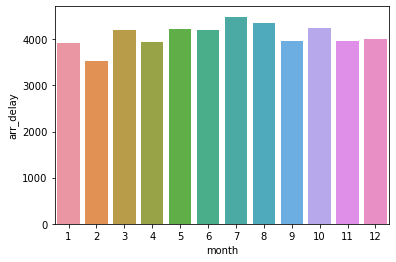

In [97]:
sns.barplot(x= monthly_count.index,y=monthly_count['arr_delay'])

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

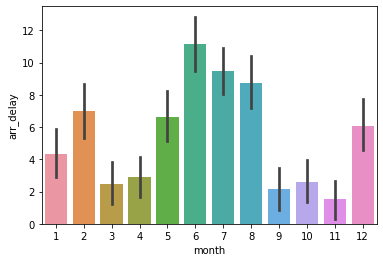

In [86]:
monthly_avg = df.groupby(['month'])['arr_delay'].mean()
sns.barplot(x=df['month'],y=df['arr_delay'])

In [88]:
monthly_avg

month
1      4.349681
2      6.973371
3      2.441955
4      2.929096
5      6.638217
6     11.136342
7      9.461676
8      8.706654
9      2.159819
10     2.586459
11     1.509863
12     6.084856
Name: arr_delay, dtype: float64

In [ ]:
"""
amount of delays don't change, but seems like avg time of delay spikes in the summer
"""

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [46]:
df['crs_dep_time']

0         949
1         739
2        1306
3        1009
4         600
         ... 
49995    2012
49996    2204
49997    1104
49998    1110
49999    1808
Name: crs_dep_time, Length: 50000, dtype: int64

In [47]:
# df['task4a'] = df[df['dep_time']].dt.time.hour
# df['task4b'] = df[df['arr_time']].dt.time.hour

<AxesSubplot:xlabel='taxi_out', ylabel='Count'>

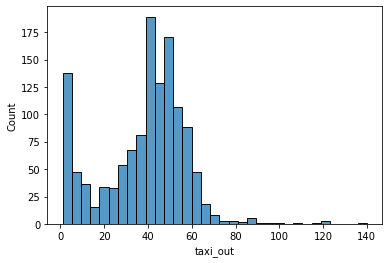

In [98]:
task4a = df.groupby(['dep_time'])['taxi_out'].count()
sns.histplot(task4a)

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

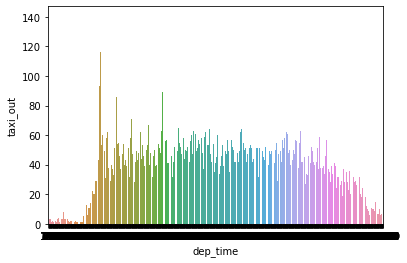

In [100]:
task4a_count = pd.DataFrame(task4a)
sns.barplot(x=task4a_count.index,y=task4a_count['taxi_out'])

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

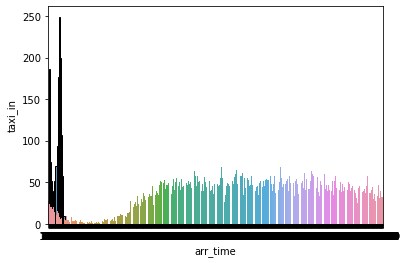

In [101]:
task4b = df.groupby(['arr_time'])['taxi_in'].count()
sns.histplot(task4b)

task4b_count = pd.DataFrame(task4b)
sns.barplot(x=task4b_count.index,y=task4b_count['taxi_in'])

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

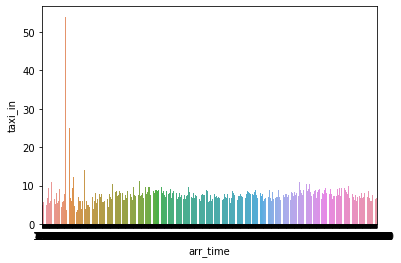

In [105]:
sns.barplot(x=df['arr_time'],y=df['taxi_in'], ci=None)

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

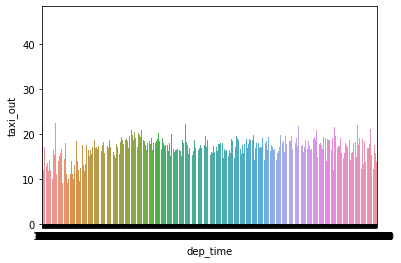

In [106]:
sns.barplot(x=df['dep_time'],y=df['taxi_out'], ci=None)

In [ ]:
#taxi times do not change during the day

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [25]:
df[df['arr_delay']!=0]['arr_delay'].count()

48048

In [34]:
adelay_count = df[df['arr_delay']!=0]['arr_delay'].count()

In [39]:
#avg count
col_5 = [
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]
task5_count = 0
for i in df[col_5]:
    task5_count += (df[df[i]>0]['arr_delay'].count())
print(task5_count)


print(task5_count/adelay_count)

#carrier delay = aircraft cleaning, bagging, etc
#late arrival delay = arrival delay from previous delay

15547
0.32357226107226106


In [ ]:
#avg time
#task5_sum = sum(df[col_5].sum())

In [132]:
dep_delay_count = df[df['dep_delay']==1]['dep_delay'].count()
arr_delay_count = df[df['arr_delay']==1]['arr_delay'].count()
delay_ratio = dep_delay_count/(dep_delay_count+arr_delay_count)
delay_ratio

0.8569741946365323

#### **Task 6**: How many states cover 50% of US air traffic? 

In [60]:
# df['origin_city_name'].unique()

drop = [
    'Ontario, CA',
    'British Columbia, CA',
    'Alberta, CA',
    'Saskatchewan, CA',
    'Manitoba, CA',
    'Quebec, CA',
    'Nova Scotia, CA',
    'New Brunswick, CA',
    'Newfoundland, CA',
    'Prince Edward Island, CA',  
]

df_half = df[~df['origin_city_name'].isin(drop)]

half = int(len(df)/2)
df[['city', 'country']] = df['origin_city_name'].str.split(',', expand=True, n=2)
df_half = df[:half]
print(df_half['country'].unique())
print(df_half.groupby(['country'])['country'].count())

[' IL' ' VA' ' IN' ' LA' ' CA' ' NV' ' CO' ' MN' ' AZ' ' DC' ' GA' ' NM'
 ' NC' ' TX' ' MI' ' FL' ' OH' ' CT' ' KY' ' NY' ' TN' ' WI' ' MA' ' MO'
 ' WA' ' AK' ' PA' ' OR' ' SC' ' PR' ' NH' ' OK' ' RI' ' ND' ' HI' ' AL'
 ' MD' ' VT' ' KS' ' AR' ' NJ' ' ID' ' SD' ' UT' ' ME' ' IA' ' NE' ' MS'
 ' WY' ' TT' ' WV' ' VI' ' MT']
country
 AK     125
 AL     157
 AR     104
 AZ     663
 CA    2754
 CO     950
 CT      98
 DC     768
 FL    1782
 GA    1314
 HI     395
 IA     110
 ID     105
 IL    1623
 IN     213
 KS      45
 KY     141
 LA     259
 MA     532
 MD     335
 ME      48
 MI     681
 MN     500
 MO     435
 MS      43
 MT      89
 NC    1044
 ND      62
 NE     107
 NH      46
 NJ     537
 NM      98
 NV     598
 NY    1376
 OH     568
 OK     152
 OR     342
 PA     739
 PR      90
 RI      59
 SC     229
 SD      37
 TN     451
 TT       6
 TX    2490
 UT     391
 VA     223
 VI       9
 VT      43
 WA     762
 WI     223
 WV      18
 WY      31
Name: country, dtype: int64


In [63]:
state_count_50 = df_half.groupby(['country'])['country'].count()
#sns.barplot()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [137]:
#velocity = distance/time

#distance = df['distance']; time = df['flight_time']

df['avg_velocity'] = df['distance']/df['air_time']*60
for i in col_5:
    df['dep_del'] = np.where(df[i]>0,1,0)
    


In [149]:
df['dep_delay'].describe()

count    49185.000000
mean        10.445502
std         46.198798
min        -42.000000
25%         -6.000000
50%         -2.000000
75%          6.000000
max       1336.000000
Name: dep_delay, dtype: float64

In [139]:
delay_speed = df[df['dep_del']==1]['avg_velocity']
no_delay_speed = df[df['dep_del']==0]['avg_velocity']

In [140]:
stats.f_oneway(delay_speed,no_delay_speed)

F_onewayResult(statistic=nan, pvalue=nan)

In [141]:
stats.kruskal(delay_speed,no_delay_speed)

KruskalResult(statistic=nan, pvalue=nan)

In [142]:
df['delay'] = np.where(df['arr_delay']>0, 1, 0)
delay_speed2 = df[df['dep_del']==1]['avg_velocity']
no_delay_speed2 = df[df['dep_del']==0]['avg_velocity']

In [143]:
df['delay'].describe()

count    50000.000000
mean         0.345340
std          0.475484
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: delay, dtype: float64

In [144]:
stats.f_oneway(delay_speed2,no_delay_speed2)

F_onewayResult(statistic=nan, pvalue=nan)

<AxesSubplot:xlabel='avg_velocity', ylabel='Count'>

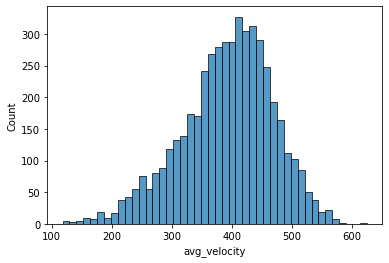

In [145]:
sns.histplot(delay_speed2)

<AxesSubplot:xlabel='avg_velocity', ylabel='Count'>

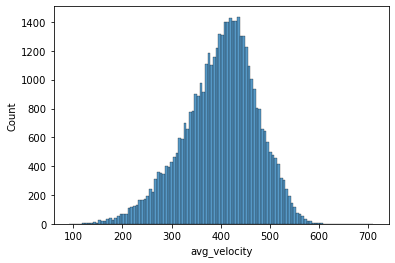

In [146]:
sns.histplot(no_delay_speed2)

In [ ]:
#planes do not fly faster

In [148]:
#using dep_delay
df['dep_del']=np.where(df[df['dep_delay']>0],1,0)
delay_speed2 = df[df['dep_del']==1]['avg_velocity']
no_delay_speed2 = df[df['dep_del']==0]['avg_velocity']

ValueError: Length of values does not match length of index

In [ ]:
stats.f_oneway(delay_speed2,no_delay_speed2)

In [ ]:
sns.histplot(delay_speed2)

In [ ]:
sns.histplot(no_delay_speed2)

In [111]:
df[['actual_elapsed_time','air_time']]

,actual_elapsed_time,air_time
0,100.0,79.0
1,80.0,58.0
2,117.0,92.0
3,175.0,161.0
4,309.0,285.0
...,...,...
49995,169.0,141.0
49996,91.0,63.0
49997,18.0,9.0
49998,158.0,126.0


In [112]:
df['e_time_diff'] = df['actual_elapsed_time']-df['air_time']
df['e_time_diff'].describe()

count    48997.000000
mean        25.120211
std         11.637897
min          4.000000
25%         18.000000
50%         23.000000
75%         29.000000
max        197.000000
Name: e_time_diff, dtype: float64

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [110]:
# > 7 = long, 3-7 medium, < 3 short

df['air_time_hr'] = df['air_time']/60
df['air_time_hr']

0        1.316667
1        0.966667
2        1.533333
3        2.683333
4        4.750000
           ...   
49995    2.350000
49996    1.050000
49997    0.150000
49998    2.100000
49999    0.766667
Name: air_time_hr, Length: 50000, dtype: float64

In [117]:
bins = [0,3,7,np.inf]
names = ['short','medium','long']
df['air_time_bin'] = pd.cut(df['air_time_hr'],bins,labels=names)

In [118]:
df['air_time_bin']

0         short
1         short
2         short
3         short
4        medium
          ...  
49995     short
49996     short
49997     short
49998     short
49999     short
Name: air_time_bin, Length: 50000, dtype: category
Categories (3, object): [short < medium < long]

<AxesSubplot:xlabel='dep_time', ylabel='air_time_hr'>

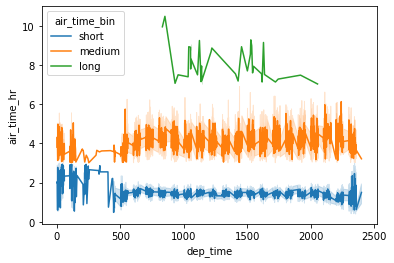

In [121]:
sns.lineplot(y=df['air_time_hr'],x=df['dep_time'],hue=df['air_time_bin'])

In [123]:
task8 = df[['fl_date','dep_time','air_time_bin']]
task8.to_csv('task8.csv')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
filename = file_path+'passengers.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 50000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s))
passengers = pd.read_csv(filename,skiprows=skip)

In [ ]:
passengers = pd.read_csv(filename)

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
monthly_delay_carrier = df.groupby(['month','mkt_carrier'])['arr_delay'].mean() #delay = dummy var; use arr_delay

monthly_distance_carrier = df.groupby(['month','mkt_carrier'])['distance'].sum()
monthly_distance_carrier_mean = df.groupby(['month','mkt_carrier'])['distance'].mean()

passengers_carrier = passengers.groupby(['unique_carrier'])['passengers'].sum()
passengers_carrier_mean = passengers.groupby(['unique_carrier'])['passengers'].mean()

# total fuel consumption => for 16m flights in flight data
# only sampled 50k flights 

In [128]:
df['dep_delay'].describe()

count    50000.000000
mean         0.101620
std          0.302151
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dep_delay, dtype: float64